<a href="https://colab.research.google.com/github/Ananthzeke/Optimization-techniques/blob/main/simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from numpy import asarray,exp
from numpy.random import rand,randn,seed,uniform

In [57]:
def objective(x):
	return  (x[0]**2+x[1]-11)**2 +(x[0]+x[1]**2-7)**2

In [58]:


def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    best =uniform(bounds[0][0],bounds[0][1],2)
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    best_track = []
    for i in range(n_iterations):
        candidate = curr + randn(2) * step_size
        candidate_eval = objective(candidate)
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            if i%100==0:
              print(f'>iteration {i}: f{best} = {best_eval}')
            best_track.append(best)
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return best, best_eval,best_track



In [59]:
seed(1)
bounds = asarray([[0, 5.0]])
n_iterations = 10000
step_size = 0.001
temp = 100
print('Starting simulated annealing algorithm\n')
best, score,best_track = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('\nSimulated annealing completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting simulated annealing algorithm

>iteration 0: f[2.08458185 3.6005495 ] = 74.10569936877003
>iteration 200: f[2.10238232 3.59323978] = 73.14092888539076
>iteration 300: f[2.11074557 3.57149442] = 70.71922530018028
>iteration 600: f[2.12842921 3.54327844] = 67.59681538280554
>iteration 1400: f[2.16837224 3.34690589] = 49.288739099997244
>iteration 1500: f[2.17503694 3.3116814 ] = 46.47448927509475
>iteration 1600: f[2.18584428 3.26762533] = 43.10617466118025
>iteration 1800: f[2.20776673 3.21044587] = 38.91133236740761
>iteration 2000: f[2.23633942 3.16415755] = 35.57906196606057
>iteration 2500: f[2.29650167 3.05834633] = 28.739154135048395
>iteration 2600: f[2.30267142 3.02351642] = 26.903287739112777
>iteration 2700: f[2.31436169 2.99810722] = 25.515202646727705
>iteration 3000: f[2.36669343 2.89220826] = 20.207367794254914
>iteration 3100: f[2.36806389 2.85555159] = 18.841123497178273
>iteration 3500: f[2.44910557 2.76687655] = 14.634481873109067
>iteration 3600: f[2.46136825

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def plot_optimization(fitness,minx,maxx,best_pos_track,levels):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=levels,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

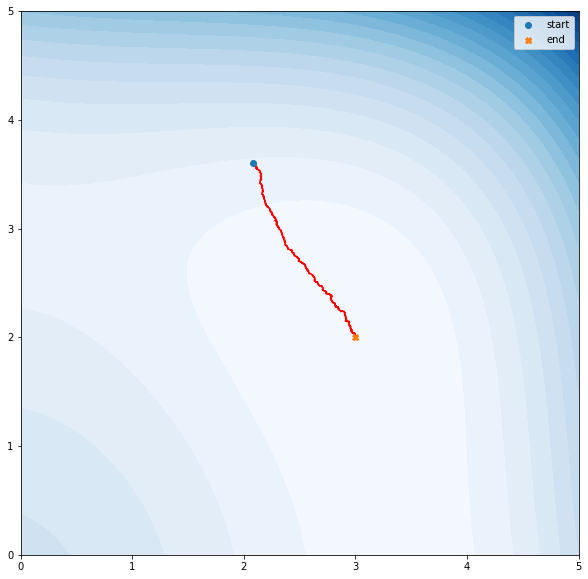

In [62]:
plot_optimization(objective,0,5,best_track,25)